In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os
import shutil
import pandas as pd
from pathlib import Path
import numpy as np
import sys
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import (
    find_outliers, convert_age_from_days_to_years, draw_age_distribution, calculate_code_age_distribution)

In [24]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [2]:
DATASET_NAME = 'RGBDS-50K-test'


In [3]:
from azureml.core import Workspace, Dataset

subscription_id = '9b5bbfae-d5d1-4aae-a2ca-75159c0c887d'
resource_group = 'cgm-ml-prod-ci-rg'
workspace_name = 'cgm-ml-prod-ci-azml'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='RGBDS-50K-test')

In [4]:
dataset

Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'


{
  "source": [
    "('cgmmlciproddsetds', 'dataset-rgbds-Test-2023-06-21-06-47-49/**')"
  ],
  "definition": [
    "GetDatastoreFiles"
  ],
  "registration": {
    "id": "86e5765b-169a-439e-8cf4-8d0f3ee9f4f7",
    "name": "RGBDS-50K-test",
    "version": 1,
    "workspace": "Workspace.create(name='cgm-ml-prod-ci-azml', subscription_id='9b5bbfae-d5d1-4aae-a2ca-75159c0c887d', resource_group='cgm-ml-prod-ci-rg')"
  }
}

In [5]:
from azureml.core import Workspace, Dataset

# Connect to Workspace and reference Dataset
ws = Workspace.from_config()
dataset = ws.datasets[DATASET_NAME]

# Create mountcontext and mount the dataset
mount_ctx = dataset.mount()  
mount_ctx.start()  

Message: Running rslex direct volume mount: RSLEX_DIRECT_VOLUME_MOUNT=None, RSLEX_DIRECT_VOLUME_WRITABLE_MOUNT=None, enable_rslex_mount=None
Payload: {"pid": 932624, "version": "4.9.5"}
Failed to extract subscription information, Exception=AttributeError; 'Logger' object has no attribute 'activity_info'


In [7]:
# Get the mount point
dataset_mount_folder = mount_ctx.mount_point
print(dataset_mount_folder)

# List the files in the mount point
files = os.listdir(dataset_mount_folder)
print(files)

/tmp/tmpfzi3rrth
['labels.csv', 'scans']


In [74]:
df = pd.read_csv(os.path.join(dataset_mount_folder, 'labels.csv'))

In [75]:
df.shape

(54040, 39)

In [76]:
# total number of scan folders/children
scans_path = os.path.join(dataset_mount_folder, 'scans')
print(scans_path)
scans_f = os.listdir(scans_path)
len(scans_f)

/tmp/tmpfzi3rrth/scans


3952

In [77]:
df['scan_id'].nunique()

7335

In [79]:
df.rename(columns={'age_rgb': 'age'}, inplace=True)
df['Years'] = df.apply(convert_age_from_days_to_years, axis=1)
df.head()

,file_path_depth,timestamp_depth,scan_id,scan_step_depth,scan_version_depth,height_depth,weight_depth,muac_depth,order_number,format_depth,artifact_depth,artifact_id_depth,device_model_depth,person_id_depth,age_depth,sex_depth,no_of_person_depth,pose_score,pose_result,ord_depth,format_temp_depth,file_path_rgb,timestamp_rgb,scan_step_rgb,scan_version_rgb,height_rgb,weight_rgb,muac_rgb,format_rgb,artifact_rgb,artifact_id_rgb,device_model_rgb,person_id_rgb,age,sex_rgb,no_of_person_rgb,ord_rgb,format_temp_rgb,rgbds_file_path,Years
0,1678302477187/716155c6-1db2-4577-ad21-073d703d...,2023-03-08-19-07-57-197184,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,7,depth,894a6260-bde4-11ed-8a41-8b4b2db07fa3,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.868541,"{'bbox_coordinates': [(443.69577, 120.54117), ...",7,depth,1678302479656/5a8cbdba-b315-4738-8a58-c8df40d8...,2023-03-08-19-07-59-697227,102,v1.2.0,86.0,11.1,14.4,rgb,8ac7daa0-bde4-11ed-8a41-ebe9ca8504ca,992e60a5-bde4-11ed-8a41-f3f29bbadd63,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,7,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...,2
1,1678302477299/a0663c27-ab21-499d-946e-01df347a...,2023-03-08-19-07-57-306511,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,8,depth,895b2b40-bde4-11ed-8a41-d38331ad8833,9929ccc2-bde4-11ed-8a41-9fa20549ed32,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.868260,"{'bbox_coordinates': [(444.9188, 167.14476), (...",8,depth,1678302478225/99e54ce7-6a48-431e-8983-fa930a02...,2023-03-08-19-07-58-244107,102,v1.2.0,86.0,11.1,14.4,rgb,89ea9a00-bde4-11ed-8a41-67a5e3166600,992b5364-bde4-11ed-8a41-3b19a3c21b49,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,8,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...,2
2,1678302477394/f12f561e-5c77-4e35-8f5f-7b9f3ff1...,2023-03-08-19-07-57-400332,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,9,depth,896a6d80-bde4-11ed-8a41-d71a98a6a79f,9929ccc3-bde4-11ed-8a41-9b68cfc69cdc,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.869756,"{'bbox_coordinates': [(446.63882, 167.11685), ...",9,depth,1678302478410/5a4d97f3-97b0-474e-8a99-0fb769dd...,2023-03-08-19-07-58-431615,102,v1.2.0,86.0,11.1,14.4,rgb,8a0797e0-bde4-11ed-8a41-63e5b2f1a6bf,992b5365-bde4-11ed-8a41-5367ab49d58b,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,9,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...,2
3,1678302477500/aafa03cf-ef2f-4749-b635-6a934226...,2023-03-08-19-07-57-509687,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,1,depth,8979afc0-bde4-11ed-8a41-e3f44c8ddfdb,9929ccc4-bde4-11ed-8a41-fbc4fa001cdc,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.848910,"{'bbox_coordinates': [(391.114, 59.477055), (7...",1,depth,1678302478606/95694799-62bc-4a63-8fac-3da9fbe4...,2023-03-08-19-07-58-619086,102,v1.2.0,86.0,11.1,14.4,rgb,8a230f20-bde4-11ed-8a41-e30d059c5222,992b5366-bde4-11ed-8a41-2f90b36494c8,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,1,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...,2
4,1678302477623/a2b66b32-df45-4688-87b6-1a2cf95d...,2023-03-08-19-07-57-634715,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,2,depth,898d85e0-bde4-11ed-8a41-f785a8289c16,9929ccc5-bde4-11ed-8a41-3bdb9e30361c,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.881596,"{'bbox_coordinates': [(425.14737, 117.32846), ...",2,depth,1678302478796/87ca0b53-9777-48a3-a09a-e27c67c3...,2023-03-08-19-07-58-806586,102,v1.2.0,86.0,11.1,14.4,rgb,8a400d00-bde4-11ed-8a41-afb499d1b32a,992e60a0-bde4-11ed-8a41-4b8357e24c81,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,2,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...,2


In [25]:
df.head()

,file_path_depth,timestamp_depth,scan_id,scan_step_depth,scan_version_depth,height_depth,weight_depth,muac_depth,order_number,format_depth,artifact_depth,artifact_id_depth,device_model_depth,person_id_depth,age_depth,sex_depth,no_of_person_depth,pose_score,pose_result,ord_depth,format_temp_depth,file_path_rgb,timestamp_rgb,scan_step_rgb,scan_version_rgb,height_rgb,weight_rgb,muac_rgb,format_rgb,artifact_rgb,artifact_id_rgb,device_model_rgb,person_id_rgb,age_rgb,sex_rgb,no_of_person_rgb,ord_rgb,format_temp_rgb,rgbds_file_path
0,1678302477187/716155c6-1db2-4577-ad21-073d703d...,2023-03-08-19-07-57-197184,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,7,depth,894a6260-bde4-11ed-8a41-8b4b2db07fa3,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.868541,"{'bbox_coordinates': [(443.69577, 120.54117), ...",7,depth,1678302479656/5a8cbdba-b315-4738-8a58-c8df40d8...,2023-03-08-19-07-59-697227,102,v1.2.0,86.0,11.1,14.4,rgb,8ac7daa0-bde4-11ed-8a41-ebe9ca8504ca,992e60a5-bde4-11ed-8a41-f3f29bbadd63,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,7,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...
1,1678302477299/a0663c27-ab21-499d-946e-01df347a...,2023-03-08-19-07-57-306511,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,8,depth,895b2b40-bde4-11ed-8a41-d38331ad8833,9929ccc2-bde4-11ed-8a41-9fa20549ed32,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.868260,"{'bbox_coordinates': [(444.9188, 167.14476), (...",8,depth,1678302478225/99e54ce7-6a48-431e-8983-fa930a02...,2023-03-08-19-07-58-244107,102,v1.2.0,86.0,11.1,14.4,rgb,89ea9a00-bde4-11ed-8a41-67a5e3166600,992b5364-bde4-11ed-8a41-3b19a3c21b49,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,8,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...
2,1678302477394/f12f561e-5c77-4e35-8f5f-7b9f3ff1...,2023-03-08-19-07-57-400332,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,9,depth,896a6d80-bde4-11ed-8a41-d71a98a6a79f,9929ccc3-bde4-11ed-8a41-9b68cfc69cdc,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.869756,"{'bbox_coordinates': [(446.63882, 167.11685), ...",9,depth,1678302478410/5a4d97f3-97b0-474e-8a99-0fb769dd...,2023-03-08-19-07-58-431615,102,v1.2.0,86.0,11.1,14.4,rgb,8a0797e0-bde4-11ed-8a41-63e5b2f1a6bf,992b5365-bde4-11ed-8a41-5367ab49d58b,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,9,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...
3,1678302477500/aafa03cf-ef2f-4749-b635-6a934226...,2023-03-08-19-07-57-509687,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,1,depth,8979afc0-bde4-11ed-8a41-e3f44c8ddfdb,9929ccc4-bde4-11ed-8a41-fbc4fa001cdc,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.848910,"{'bbox_coordinates': [(391.114, 59.477055), (7...",1,depth,1678302478606/95694799-62bc-4a63-8fac-3da9fbe4...,2023-03-08-19-07-58-619086,102,v1.2.0,86.0,11.1,14.4,rgb,8a230f20-bde4-11ed-8a41-e30d059c5222,992b5366-bde4-11ed-8a41-2f90b36494c8,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,1,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...
4,1678302477623/a2b66b32-df45-4688-87b6-1a2cf95d...,2023-03-08-19-07-57-634715,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.1,14.4,2,depth,898d85e0-bde4-11ed-8a41-f785a8289c16,9929ccc5-bde4-11ed-8a41-3bdb9e30361c,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.881596,"{'bbox_coordinates': [(425.14737, 117.32846), ...",2,depth,1678302478796/87ca0b53-9777-48a3-a09a-e27c67c3...,2023-03-08-19-07-58-806586,102,v1.2.0,86.0,11.1,14.4,rgb,8a400d00-bde4-11ed-8a41-afb499d1b32a,992e60a0-bde4-11ed-8a41-4b8357e24c81,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,2,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...


In [80]:
# Total number of artifacts
print(f"Total Number of artifacts: {len(df['artifact_id_depth'])}")
print(f"Total Number of scans: {len(df.groupby('scan_id'))}")

Total Number of artifacts: 54040
Total Number of scans: 7335


In [81]:
# sample rgbds_file_path
sample_file = df['rgbds_file_path'][0]
print(sample_file)

outputs-test//scans/986b10a0-bde4-11ed-8a41-bf9971bab2fb/102/pc_9929ccc0-bde4-11ed-8a41-831d357776db_2023-03-08-19-07-57-197184_102_7.p


## Sample file

In [82]:
# sample scan
sample_scan = scans_f[0]
print(f'sample_scan: {sample_scan}')
f = scans_path + '/' + sample_scan + '/' + '202'
print(f"sample filepath: {f}")
print(os.listdir(f))

f_path = f + '/' + os.listdir(f)[0]
print(f_path)


sample_scan: 00259460-be74-11ed-8a41-273dd1f8751f
sample filepath: /tmp/tmpfzi3rrth/scans/00259460-be74-11ed-8a41-273dd1f8751f/202
['pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-591560_202_3.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-700936_202_4.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-794689_202_5.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-904037_202_6.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-404182_202_7.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-576047_202_8.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-716616_202_9.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-48-904160_202_1.p', 'pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-49-044754_202_2.p']
/tmp/tmpfzi3rrth/scans/00259460-be74-11ed-8a41-273dd1f8751f/202/pc_01edd140-be74-11ed-8a41-e7d2bdde4094_2023-03-09-12-14-43-591560_202_3.p


In [83]:
depthmaps, target = pickle.load(open(f_path, "rb"))

In [84]:
# depthmaps is a list of 3 npz arrays (Depthmap, RGB, segment)
depth, rgb, segment = depthmaps
# depthmaps[0].shape, depthmaps[1].shape, depthmaps[2].shape
print(f"Shape of Depthmap: {depth.shape}, RGB: {rgb.shape}, segment map: {segment.shape}")

Shape of Depthmap: (240, 180, 1), RGB: (240, 180, 3), segment map: (240, 180, 1)


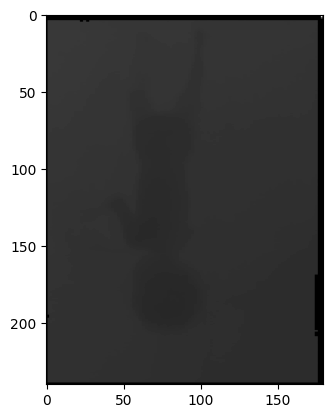

In [85]:
_ = plt.imshow(np.squeeze(depth), cmap='gray')
plt.show()

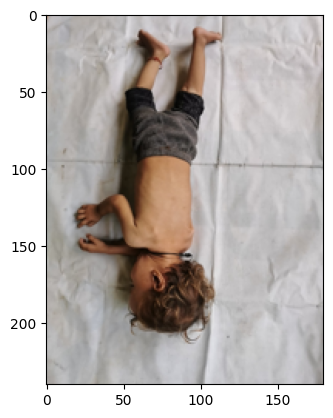

In [86]:
_ = plt.imshow(np.squeeze(rgb), cmap='gray')
plt.show()

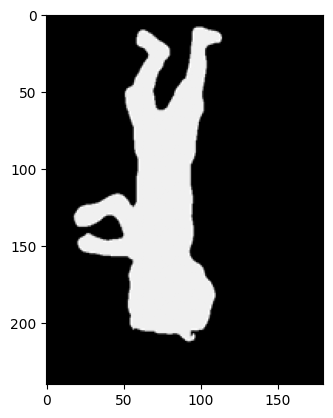

In [87]:
_ = plt.imshow(np.squeeze(segment), cmap='gray')
plt.show()

In [88]:
target

{'file_path_depth': '1678364083585/df864a79-30fe-4015-8571-eceae740e637',
 'timestamp_depth': '2023-03-09-12-14-43-591560',
 'scan_id': '01edd140-be74-11ed-8a41-e7d2bdde4094',
 'scan_step_depth': 202,
 'scan_version_depth': 'v1.2.0',
 'height_depth': 66.0,
 'weight_depth': 5.25,
 'muac_depth': 10.9,
 'order_number': 3,
 'format_depth': 'depth',
 'artifact_depth': 'f9910260-be73-11ed-8a41-5b17fbcc7508',
 'artifact_id_depth': '01edd141-be74-11ed-8a41-3fbf80d9071a',
 'device_model_depth': 'HUAWEI VOG-L29',
 'person_id_depth': '00259460-be74-11ed-8a41-273dd1f8751f',
 'age_depth': 630,
 'sex_depth': 'female',
 'no_of_person_depth': '1',
 'pose_score': '0.9121783',
 'pose_result': "{'bbox_coordinates': [(401.02188, 184.5189), (990.96344, 1404.7535)], 'bbox_confidence_score': [0.99714285], 'key_points_coordinate': [{'nose': {'x': 1030.6592, 'y': 739.686}}, {'left_eye': {'x': 1062.4362, 'y': 739.686}}, {'right_eye': {'x': 1062.4362, 'y': 739.686}}, {'left_ear': {'x': 1046.5476, 'y': 588.7455}}

## Analysis

In [89]:
print("Total no. of artifacts:", len(df))
unique_scan_ids = df.drop_duplicates(subset='scan_id', keep='first')
print("Total no. of unique scan ids:", len(unique_scan_ids))
unique_person_ids = df.drop_duplicates(subset='person_id_depth', keep='first')
print("Total no. of unique person ids:", len(unique_person_ids))

Total no. of artifacts: 54040
Total no. of unique scan ids: 7335
Total no. of unique person ids: 3952


device_model_depth
HUAWEI VOG-L29    54040
Name: count, dtype: int64


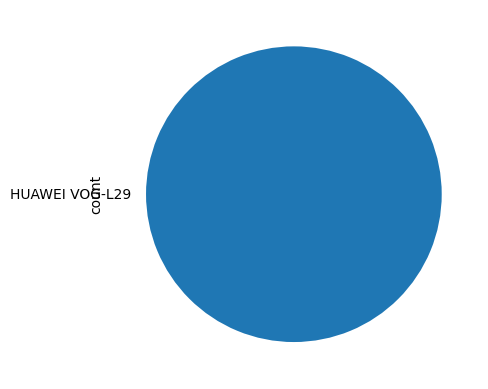

In [90]:
print(df['device_model_depth'].value_counts())
_ = df['device_model_depth'].value_counts().plot(kind='pie')

scan_version_depth
v1.2.0    24178
v0.8      23415
v1.2.1     6346
v0.9        101
Name: count, dtype: int64


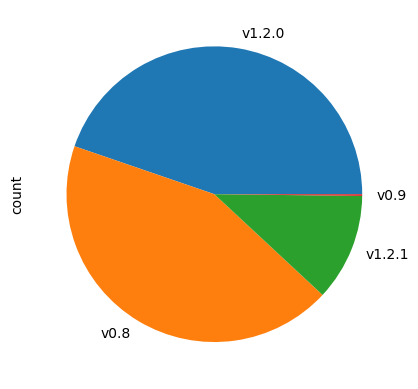

In [91]:
print(df['scan_version_depth'].value_counts())
_ = df['scan_version_depth'].value_counts().plot(kind='pie')

Years
0    432
1    928
2    850
3    851
4    884
5      7
Name: count, dtype: int64


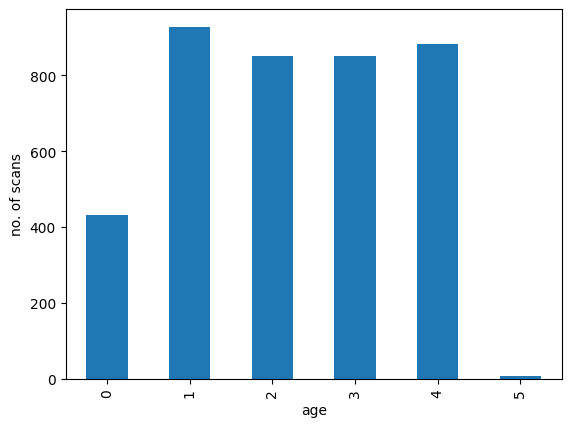

In [92]:
# draw_age_distribution(unique_person_ids)
# def draw_age_distribution(scans: pd.DataFrame):
# ---> 27     value_counts = scans['Years'].value_counts().sort_index(ascending=True)
#      28     age_ax = value_counts.plot(kind='bar')
#      29     age_ax.set_xlabel('age')

draw_age_distribution(unique_person_ids)

Years
0     771
1    1724
2    1611
3    1559
4    1656
5      14
Name: count, dtype: int64


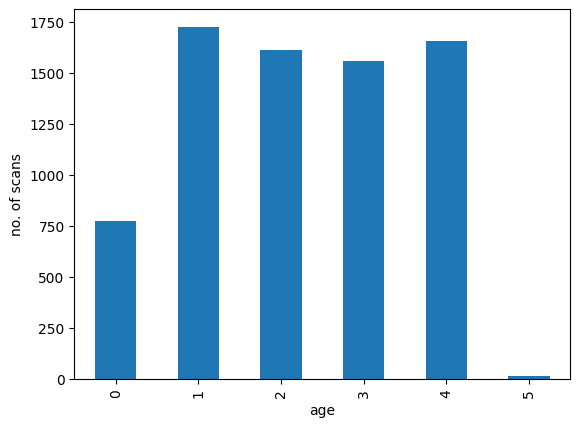

In [93]:
draw_age_distribution(unique_scan_ids)

scan_step_rgb
102    28140
100    13906
202     8065
200     3929
Name: count, dtype: int64


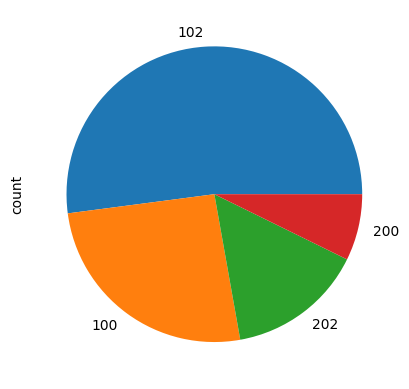

In [94]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(df['scan_step_rgb'].value_counts())
_ = df['scan_step_rgb'].value_counts().plot(kind='pie')

In [95]:
scan_type_colname = 'scan_step_depth' # for other datasets this can be "key"
calculate_code_age_distribution(df, scan_type_colname)

2023-06-22 06:06:22,354 - INFO - scan_step_depth - /mnt/batch/tasks/shared/LS_root/mounts/clusters/rbanka2/code/Users/rbanka/cgm-ml/cgmml/data_utils/dataset_EDA/data_utilities.py: line 52


,0,1,2,3,4
codes,,,,,
102,223,3741,7738,7873,8502
100,103,1643,3507,3885,4713
202,3485,4224,225,113,18
200,1717,2064,116,32,0


### Distribution of height, weight and age against each other

In [96]:
unique_scan_ids.head()

,file_path_depth,timestamp_depth,scan_id,scan_step_depth,scan_version_depth,height_depth,weight_depth,muac_depth,order_number,format_depth,artifact_depth,artifact_id_depth,device_model_depth,person_id_depth,age_depth,sex_depth,no_of_person_depth,pose_score,pose_result,ord_depth,format_temp_depth,file_path_rgb,timestamp_rgb,scan_step_rgb,scan_version_rgb,height_rgb,weight_rgb,muac_rgb,format_rgb,artifact_rgb,artifact_id_rgb,device_model_rgb,person_id_rgb,age,sex_rgb,no_of_person_rgb,ord_rgb,format_temp_rgb,rgbds_file_path,Years
0,1678302477187/716155c6-1db2-4577-ad21-073d703d...,2023-03-08-19-07-57-197184,9929ccc0-bde4-11ed-8a41-831d357776db,102,v1.2.0,86.0,11.10,14.4,7,depth,894a6260-bde4-11ed-8a41-8b4b2db07fa3,9929ccc1-bde4-11ed-8a41-c72ffd5f6d10,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,0.868541,"{'bbox_coordinates': [(443.69577, 120.54117), ...",7,depth,1678302479656/5a8cbdba-b315-4738-8a58-c8df40d8...,2023-03-08-19-07-59-697227,102,v1.2.0,86.0,11.10,14.4,rgb,8ac7daa0-bde4-11ed-8a41-ebe9ca8504ca,992e60a5-bde4-11ed-8a41-f3f29bbadd63,HUAWEI VOG-L29,986b10a0-bde4-11ed-8a41-bf9971bab2fb,837,female,1,7,rgb,outputs-test//scans/986b10a0-bde4-11ed-8a41-bf...,2
9,1678302451222/e481e681-a9dc-4501-86aa-c1a06ed9...,2023-03-08-19-07-31-228055,aab78361-bde4-11ed-8a41-9382d32711a5,100,v1.2.0,86.9,11.35,15.5,1,depth,79cfad40-bde4-11ed-8a41-17fe789699ea,aaba90a0-bde4-11ed-8a41-c712d18e14f5,HUAWEI VOG-L29,aab5fcc0-bde4-11ed-8a41-2bb725dac827,1088,male,1,0.947321,"{'bbox_coordinates': [(310.09265, 137.10991), ...",1,depth,1678302452280/750230e0-81d2-48e2-a253-8cc38754...,2023-03-08-19-07-32-306173,100,v1.2.0,86.9,11.35,15.5,rgb,7a7478c0-bde4-11ed-8a41-a3165d89ce9d,aaba90a9-bde4-11ed-8a41-b76e168ac8c5,HUAWEI VOG-L29,aab5fcc0-bde4-11ed-8a41-2bb725dac827,1088,male,1,1,rgb,outputs-test//scans/aab5fcc0-bde4-11ed-8a41-2b...,2
18,1678302477218/b84230b7-4c26-433c-91a7-c90b583c...,2023-03-08-19-07-57-228482,ab37afe0-bde4-11ed-8a41-6724d391b1be,102,v1.2.0,86.9,11.35,15.5,1,depth,894ef640-bde4-11ed-8a41-7f5910b68fe7,ab3abd20-bde4-11ed-8a41-13e52f784101,HUAWEI VOG-L29,aab5fcc0-bde4-11ed-8a41-2bb725dac827,1088,male,1,0.869604,"{'bbox_coordinates': [(381.59152, 122.04487), ...",1,depth,1678302478357/99fdb6d1-f2fb-455c-8cf8-2f77d16b...,2023-03-08-19-07-58-369109,102,v1.2.0,86.9,11.35,15.5,rgb,89fce980-bde4-11ed-8a41-97eb7f20a02a,ab3dca61-bde4-11ed-8a41-1b9f51c6947c,HUAWEI VOG-L29,aab5fcc0-bde4-11ed-8a41-2bb725dac827,1088,male,1,1,rgb,outputs-test//scans/aab5fcc0-bde4-11ed-8a41-2b...,2
27,1678302455119/881c5bed-0cd9-455d-a561-f794aa2f...,2023-03-08-19-07-35-118742,addd2d60-bde4-11ed-8a41-83da0ac301cc,102,v1.2.0,90.3,11.15,13.7,1,depth,7c213e60-bde4-11ed-8a41-a77b2c798dc9,ade03aa0-bde4-11ed-8a41-3f286fe59a31,HUAWEI VOG-L29,addba6c0-bde4-11ed-8a41-2f3875ba304b,1440,female,1,0.844168,"{'bbox_coordinates': [(393.86563, 252.48816), ...",1,depth,1678302456068/913bd89e-ffd0-4c4c-afb1-eff2352b...,2023-03-08-19-07-36-087450,102,v1.2.0,90.3,11.15,13.7,rgb,7cb54100-bde4-11ed-8a41-5760d6f99e87,ade03aa9-bde4-11ed-8a41-e71adbc93b3d,HUAWEI VOG-L29,addba6c0-bde4-11ed-8a41-2f3875ba304b,1440,female,1,1,rgb,outputs-test//scans/addba6c0-bde4-11ed-8a41-2f...,3
36,1678302484822/c542b4c4-b3eb-4bf9-9ec5-c17c2c5f...,2023-03-08-19-08-04-822332,ae637460-bde4-11ed-8a41-174305a7c183,100,v1.2.0,90.3,11.15,13.7,1,depth,8dd827e0-bde4-11ed-8a41-f7c646b21431,ae64fb00-bde4-11ed-8a41-3b73b4540f2f,HUAWEI VOG-L29,addba6c0-bde4-11ed-8a41-2f3875ba304b,1440,female,1,0.947517,"{'bbox_coordinates': [(348.92038, 156.47133), ...",1,depth,1678302485916/1a3084b8-3f47-4207-b2fc-8919e2b5...,2023-03-08-19-08-05-947351,100,v1.2.0,90.3,11.15,13.7,rgb,8e818740-bde4-11ed-8a41-d3733f5a9a74,ae64fb09-bde4-11ed-8a41-fb890da253ce,HUAWEI VOG-L29,addba6c0-bde4-11ed-8a41-2f3875ba304b,1440,female,1,1,rgb,outputs-test//scans/addba6c0-bde4-11ed-8a41-2f...,3


In [97]:
# unique_scan_ids['age_depth'].value_counts()

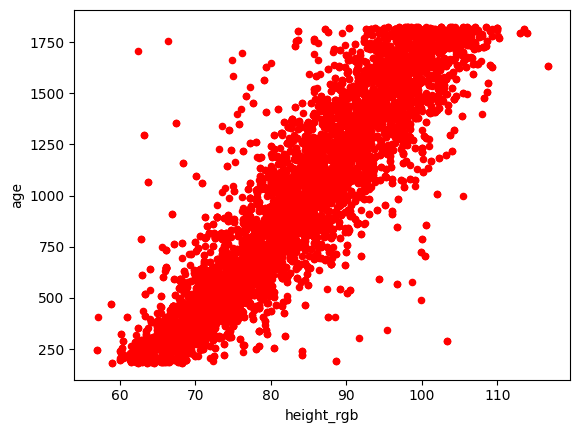

In [98]:
#distribution of height against age
height_vs_age = unique_scan_ids.plot.scatter(x='height_rgb', y='age', c='red')

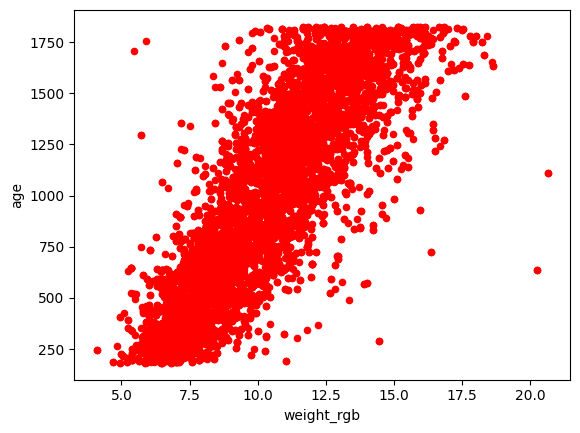

In [100]:
#distribution of weight against age
weight_vs_age = unique_scan_ids.plot.scatter(x='weight_rgb', y='age', c='red')

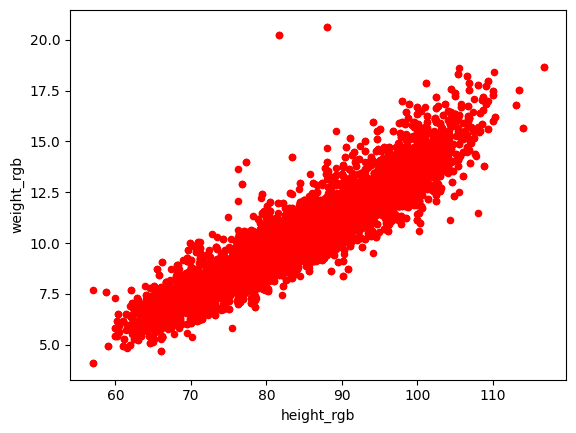

In [101]:
weight_vs_height = unique_scan_ids.plot.scatter(x='height_rgb', y='weight_rgb', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [102]:
df.describe()

,scan_step_depth,height_depth,weight_depth,muac_depth,order_number,age_depth,no_of_person_depth,pose_score,ord_depth,scan_step_rgb,height_rgb,weight_rgb,muac_rgb,age,no_of_person_rgb,ord_rgb,Years
count,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000,54040.000000
mean,123.534604,85.100246,10.585236,13.740886,5.080440,1033.496817,1.062898,0.829725,5.080440,123.534604,85.100246,10.585236,13.740886,1033.496817,1.062972,5.080440,2.295984
std,41.569193,11.322713,2.556902,1.029038,2.832171,479.036848,0.302326,0.148819,2.832171,41.569193,11.322713,2.556902,1.029038,479.036848,0.302494,2.832171,1.325520
min,100.000000,57.000000,4.100000,9.600000,1.000000,183.000000,1.000000,0.046948,1.000000,100.000000,57.000000,4.100000,9.600000,183.000000,1.000000,1.000000,0.000000
25%,100.000000,76.200000,8.600000,13.100000,3.000000,614.000000,1.000000,0.802603,3.000000,100.000000,76.200000,8.600000,13.100000,614.000000,1.000000,3.000000,1.000000
50%,102.000000,85.700000,10.550000,13.700000,5.000000,1046.000000,1.000000,0.862586,5.000000,102.000000,85.700000,10.550000,13.700000,1046.000000,1.000000,5.000000,2.000000
75%,102.000000,94.400000,12.400000,14.400000,7.000000,1455.000000,1.000000,0.928504,7.000000,102.000000,94.400000,12.400000,14.400000,1455.000000,1.000000,7.000000,3.000000
max,202.000000,116.700000,20.650000,18.200000,36.000000,1825.000000,9.000000,0.975601,36.000000,202.000000,116.700000,20.650000,18.200000,1825.000000,9.000000,36.000000,5.000000


In [103]:
unique_scan_ids.describe()

,scan_step_depth,height_depth,weight_depth,muac_depth,order_number,age_depth,no_of_person_depth,pose_score,ord_depth,scan_step_rgb,height_rgb,weight_rgb,muac_rgb,age,no_of_person_rgb,ord_rgb,Years
count,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000,7335.000000
mean,124.637491,84.463013,10.449996,13.711057,1.998500,1006.803817,1.083572,0.828490,1.998500,124.637491,84.463013,10.449996,13.711057,1006.803817,1.083572,1.998500,2.224540
std,42.404295,11.266494,2.542301,1.026418,2.132347,476.012393,0.350653,0.160349,2.132347,42.404295,11.266494,2.542301,1.026418,476.012393,0.350653,2.132347,1.318368
min,100.000000,57.000000,4.100000,9.600000,1.000000,183.000000,1.000000,0.076449,1.000000,100.000000,57.000000,4.100000,9.600000,183.000000,1.000000,1.000000,0.000000
25%,100.000000,75.300000,8.400000,13.000000,1.000000,591.000000,1.000000,0.801970,1.000000,100.000000,75.300000,8.400000,13.000000,591.000000,1.000000,1.000000,1.000000
50%,102.000000,84.700000,10.350000,13.600000,1.000000,995.000000,1.000000,0.869062,1.000000,102.000000,84.700000,10.350000,13.600000,995.000000,1.000000,1.000000,2.000000
75%,102.000000,93.600000,12.250000,14.400000,2.000000,1419.000000,1.000000,0.937304,2.000000,102.000000,93.600000,12.250000,14.400000,1419.000000,1.000000,2.000000,3.000000
max,202.000000,116.700000,20.650000,18.200000,20.000000,1825.000000,6.000000,0.973184,20.000000,202.000000,116.700000,20.650000,18.200000,1825.000000,6.000000,20.000000,5.000000


### 1) Check age

In [108]:
find_outliers(df, 'age', '<365/2', data_id_name='person_id_depth')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [110]:
find_outliers(df, 'age', '<365/2', data_id_name='scan_id')

Running the following query: @df.age<365/2
No. of outliers: 0


[]

In [112]:
find_outliers(df, 'age', '>365*6', data_id_name='scan_id')

Running the following query: @df.age>365*6
No. of outliers: 0


[]

### 2) Check weight

In [113]:
find_outliers(df, 'weight_rgb', '<5.0', data_id_name='scan_id')

Running the following query: @df.weight_rgb<5.0
No. of outliers: 9


['b28888c0-beaf-11ed-8a41-d791b4da2641',
 'b4926280-beaf-11ed-8a41-23bd582bcf6c',
 '159167c1-bef1-11ed-8a41-57719449f600',
 '17a77680-bef1-11ed-8a41-1f378819c0d0',
 '6c44c801-bf96-11ed-8a41-b75dbedb3f3d',
 '6e965920-bf96-11ed-8a41-9b62eac680fb',
 '7e294c00-bfa8-11ed-8a41-0bf3fedc5ba7',
 '7ed124c0-bfa8-11ed-8a41-3324246620b3',
 'b3441740-bfc5-11ed-8a41-433d9212256e']

In [114]:
find_outliers(df, 'weight_rgb', '>30.0', data_id_name='scan_id')

Running the following query: @df.weight_rgb>30.0
No. of outliers: 0


[]

### 3) Check height

In [116]:
find_outliers(df, 'height_rgb', '<40.0', data_id_name='scan_id')

Running the following query: @df.height_rgb<40.0
No. of outliers: 0


[]

In [117]:
find_outliers(df, 'height_rgb', '>150.0', data_id_name='scan_id')

Running the following query: @df.height_rgb>150.0
No. of outliers: 0


[]

In [118]:
# now close the mount context
mount_ctx.stop()